## 🌲 Forest Fires Dataset - 3D Visualization

This notebook explores the **Forest Fires Dataset** from the UCI Machine Learning Repository.


## 📁 Dataset Overview
- **Source:** [UCI Forest Fires Dataset](https://archive.ics.uci.edu/dataset/162/forest+fires)
- **Instances:** 517
- **Features:** 13 (spatial, meteorological, FWI indexes, area burned)
- **Objective:** Visualize how different variables (e.g., temperature, fire area) vary over space

## 📥 Step 1: Load and Inspect Dataset


In [1]:
import pandas as pd
import os
file_path = 'C:/Users/hanib/OneDrive/Desktop/forestfires.csv'
df = pd.read_csv(file_path)
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 🛠 Step 2: Preprocess Data

The dataset contains categorical values for `month` and `day`. We'll convert them to numeric codes for plotting.


In [2]:
df['month_num'] = df['month'].astype('category').cat.codes
df['day_num'] = df['day'].astype('category').cat.codes


## 🔥 Step 3: 3D Scatter Plot of Fire Area

This plot shows the burned area (log-scaled) based on the spatial coordinates `X` and `Y`.


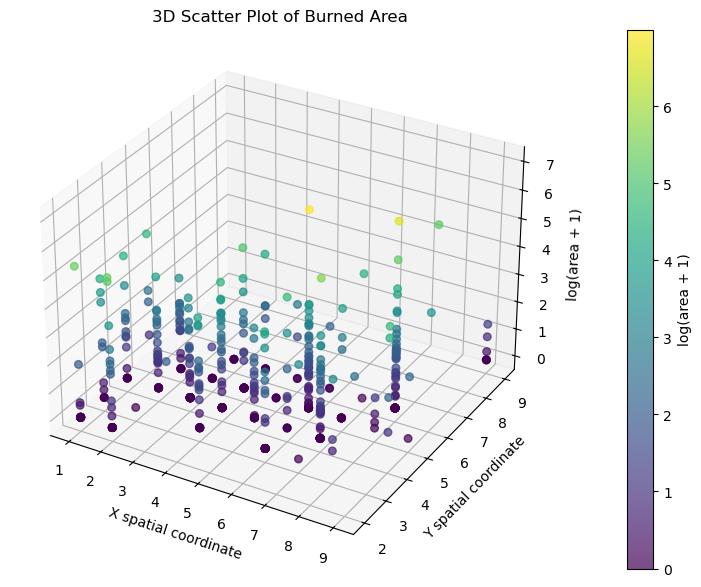

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Add log(area + 1) to handle skewed values
df['log_area'] = np.log1p(df['area'])

x = df['X']
y = df['Y']
z = df['log_area']
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=30, alpha=0.7)
ax.set_xlabel('X spatial coordinate')
ax.set_ylabel('Y spatial coordinate')
ax.set_zlabel('log(area + 1)')
plt.colorbar(sc, pad=0.1, label='log(area + 1)')
plt.title('3D Scatter Plot of Burned Area')
plt.show()


## 🌡️ Step 4: 3D Surface Plot of Temperature

This plot shows how temperature varies spatially using a surface plot over the `X` and `Y` grid.


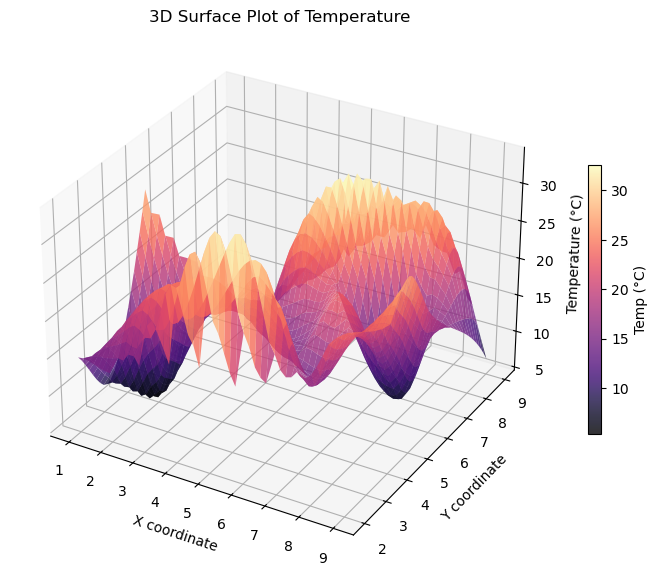

In [4]:
from scipy.interpolate import griddata

xi = np.linspace(df['X'].min(), df['X'].max(), 50)
yi = np.linspace(df['Y'].min(), df['Y'].max(), 50)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((df['X'], df['Y']), df['temp'], (xi, yi), method='cubic')

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', edgecolor='none', alpha=0.8)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Temperature (°C)')
fig.colorbar(surf, shrink=0.5, label='Temp (°C)')
plt.title('3D Surface Plot of Temperature')
plt.show()


## 📌 Summary & Insights

- The **3D scatter plot** revealed that burned areas are concentrated in certain spatial regions, but highly skewed.
- The **surface plot** provided a smooth view of **temperature variation**, useful for studying environmental patterns.
- Applying log-transformation on the burned area helped visualize the wide distribution of fire intensities.


## 🔀 Step 5: Clustering Fire-Prone Zones

I'll use KMeans clustering on spatial coordinates (`X`, `Y`) and burned area to identify patterns in fire-prone zones.


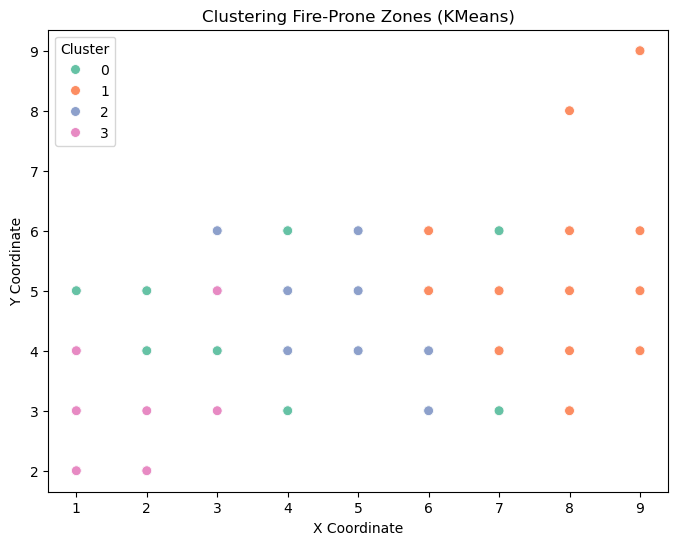

In [5]:
import warnings
from sklearn.cluster import KMeans
import seaborn as sns
os.environ["LOKY_MAX_CPU_COUNT"] = "4"       
os.environ["OMP_NUM_THREADS"] = "3"          
warnings.filterwarnings("ignore", category=UserWarning)

X_cluster = df[['X', 'Y', 'log_area']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='X', y='Y', hue='cluster', palette='Set2', s=50)
plt.title('Clustering Fire-Prone Zones (KMeans)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Cluster')
plt.show()


## 🌬️ Step 6: 3D Plot with Wind or Humidity

Let’s add wind speed or relative humidity as the third variable in a 3D plot to explore spatial weather variation.


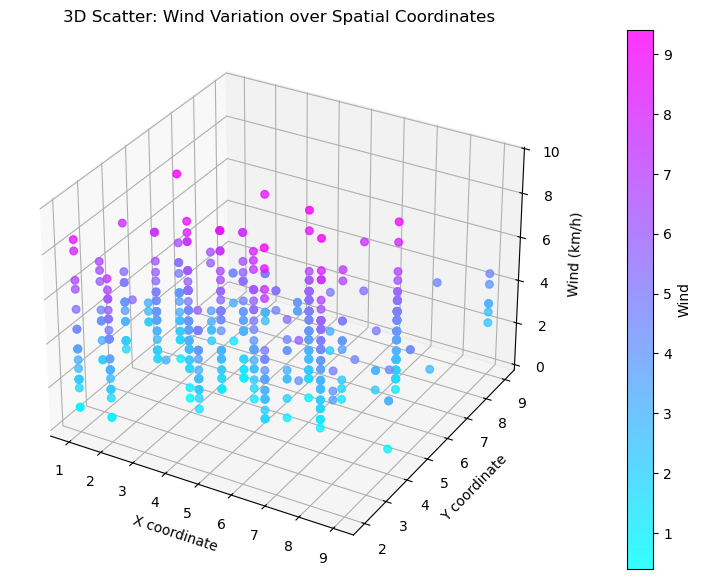

In [6]:
z = df['wind'] 

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['X'], df['Y'], z, c=z, cmap='cool', s=30, alpha=0.8)

ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Wind (km/h)')
plt.colorbar(sc, pad=0.1, label='Wind')
plt.title('3D Scatter: Wind Variation over Spatial Coordinates')
plt.show()


## 🤖 Step 7: Regression Model for Predicting Burned Area

I’ll train a simple Linear Regression model to predict burned area using relevant features.


📊 Model Performance Comparison:
Linear Regression -> RMSE: 1.4802, R²: 0.0031
Random Forest     -> RMSE: 1.4925, R²: -0.0135


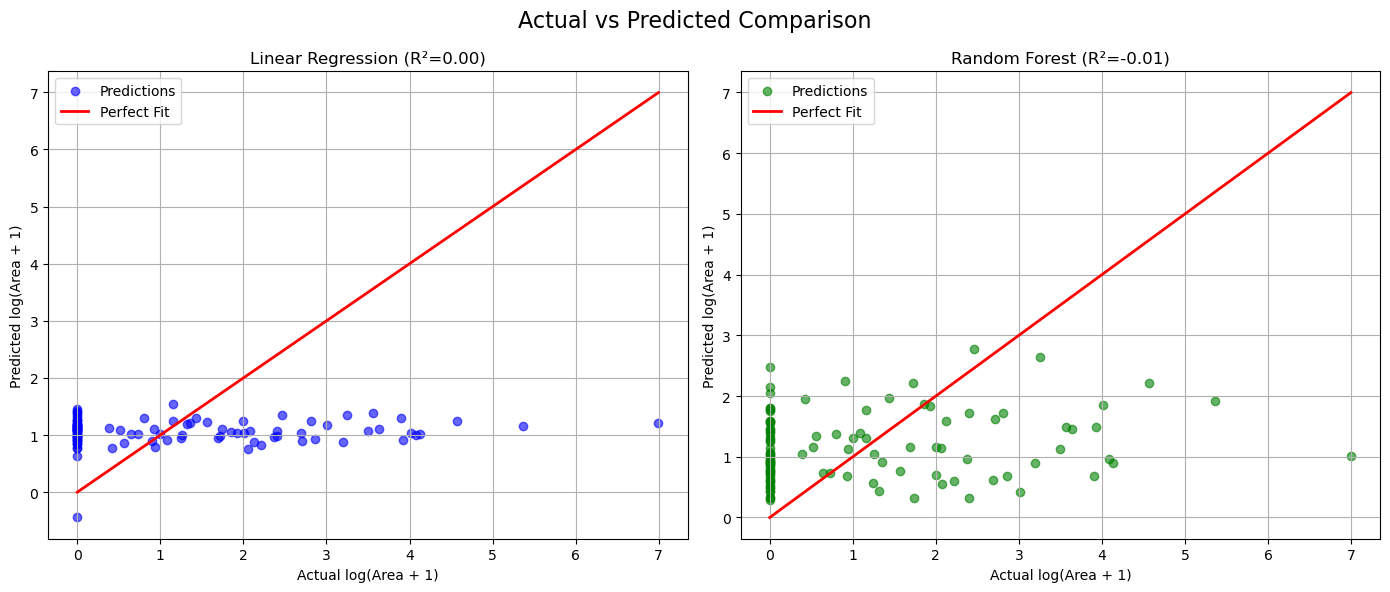

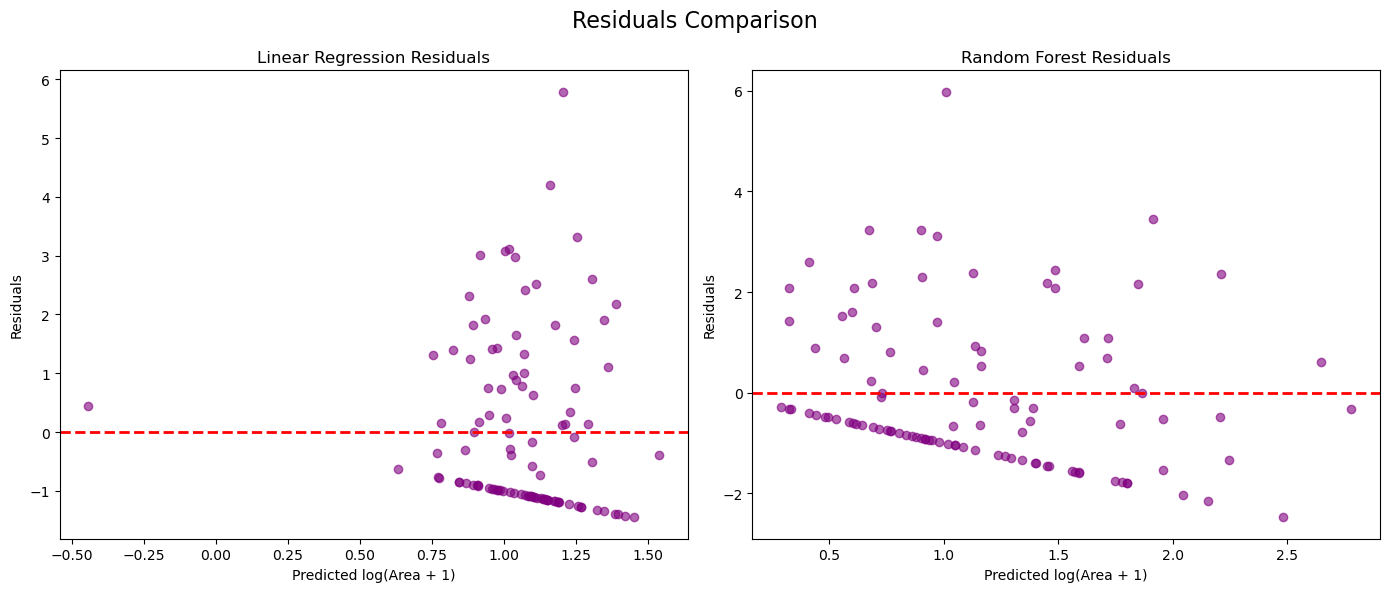

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

# --- Data ---
features = ['temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI']
X = df[features]
y = df['log_area']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# --- Random Forest ---
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Model Performance Comparison:")
print(f"Linear Regression -> RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest     -> RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

# --- 1. Actual vs Predicted Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linewidth=2, label='Perfect Fit')
axes[0].set_title(f"Linear Regression (R²={r2_lr:.2f})")
axes[0].set_xlabel("Actual log(Area + 1)")
axes[0].set_ylabel("Predicted log(Area + 1)")
axes[0].legend()
axes[0].grid(True)

# Random Forest
axes[1].scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Predictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linewidth=2, label='Perfect Fit')
axes[1].set_title(f"Random Forest (R²={r2_rf:.2f})")
axes[1].set_xlabel("Actual log(Area + 1)")
axes[1].set_ylabel("Predicted log(Area + 1)")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Actual vs Predicted Comparison", fontsize=16)
plt.tight_layout()
plt.show()

# --- 2. Residuals Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# LR Residuals
residuals_lr = y_test - y_pred_lr
axes[0].scatter(y_pred_lr, residuals_lr, color='purple', alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title("Linear Regression Residuals")
axes[0].set_xlabel("Predicted log(Area + 1)")
axes[0].set_ylabel("Residuals")

# RF Residuals
residuals_rf = y_test - y_pred_rf
axes[1].scatter(y_pred_rf, residuals_rf, color='purple', alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title("Random Forest Residuals")
axes[1].set_xlabel("Predicted log(Area + 1)")
axes[1].set_ylabel("Residuals")

plt.suptitle("Residuals Comparison", fontsize=16)
plt.tight_layout()
plt.show()
